In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.ticker as ticker
from PIL import Image
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Q1

1.a

In [3]:
data_a = pd.read_csv('C:/Users/USER/Desktop/Course/Data Analytics/DA05/auto-mpg.data.csv')
data_a = data_a[data_a['horsepower'] != '?']
data_a['horsepower'] = data_a['horsepower'].astype(float)
auto_mpg = data_a.iloc[:,1:-1]

In [5]:
def FA_func(X=None, isCorrMX=False, n_factors=None):
    n = len(X) # sample size
    p = len(X.columns) # number of variables
    X = (np.eye(n)-np.ones((n,n))/int(n)) @  X # center X
    Z = X / np.std(X, axis=0) # standardize X
    
    S = np.cov(X, rowvar=False) # covariance matrix of X 
    R = np.corrcoef(X, rowvar=False) # correlation matrix of X
    
    if isCorrMX == True:
         eig_vals, eig_vecs = np.linalg.eig(R) # spectral decomposition
    else:
         eig_vals, eig_vecs = np.linalg.eig(S)
    
    A = np.sqrt(np.diag(eig_vals)) @ eig_vecs.T # loading matrix
    q = n_factors 
    A = A[:q] # choose q factors
    
    h_square = np.diag(A.T @ A) # communality vector
    
    if isCorrMX == True:
        psi = np.diag(R - A.T @ A) # uniqueness vector
    else:
        psi = np.diag(S - A.T @ A)
    
    if isCorrMX == True:
        F = Z @ np.linalg.inv(np.diag(psi)) @ A.T @ np.linalg.inv(A @ np.linalg.inv(np.diag(psi)) @ A.T) # estimate factor matrix
    else:
        F = X @ np.linalg.inv(np.diag(psi)) @ A.T @ np.linalg.inv(A @ np.linalg.inv(np.diag(psi)) @ A.T)
    
    if isCorrMX == True:
        var_contributed = eig_vals/p # proportions of total variance contributed by each factor
    else:
        var_contributed = eig_vals/np.trace(S)

    #Scree plot
    fig, ax1 = plt.subplots(figsize=(8,5))

    FC = pd.Series({f"FC{i+1}":eig_vals[i] for i in range(q)}) # Variance of each factor
    ax1.bar(FC.keys(), FC.values, width=0.5, align='center', 
            label='Variance of Factor')
    ax1.set_title('Scree Plot with Variance Explained')
    ax1.set_xlabel('Factor')
    ax1.set_ylabel('Variance')
    if len(FC.keys()) > 10:
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
    
    ax2 = ax1.twinx()
    variance_ratio = var_contributed.cumsum()
    ax2.plot(FC.keys(), variance_ratio[:q], 'o-', linewidth=2, c='r', 
             label='Cumulative Percentage of Variance Explained')
    ax2.set_ylabel('Cumulative Percentage(%)')
    ax2.set_ylim(0, 1)
    ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
   
    fig.legend(loc='center', fontsize=12, shadow=True)

    return A, F, h_square, psi, var_contributed

1.b

(array([[-0.94088961, -0.97363466, -0.93968549, -0.92763528,  0.63934801,
          0.46115385,  0.64333247],
        [-0.11655335, -0.10417141,  0.13810299, -0.1966014 , -0.46750447,
         -0.62293543,  0.50126082]]),
             0         1
 0   -1.135419  0.702985
 1   -1.565446  1.168683
 2   -1.310756  1.216854
 3   -1.229592  1.097711
 4   -1.198778  1.164903
 ..        ...       ...
 387  0.602202 -1.119506
 388  1.310047 -2.149835
 389  0.629609 -0.233163
 390  0.823389 -1.584506
 391  0.811415 -1.708335
 
 [392 rows x 2 columns],
 array([0.89885793, 0.95881614, 0.90208125, 0.89915932, 0.6273263 ,
        0.60071143, 0.66513908]),
 array([0.10114207, 0.04118386, 0.09791875, 0.10084068, 0.3726737 ,
        0.39928857, 0.33486092]),
 array([0.65886559, 0.13429033, 0.1063093 , 0.06875853, 0.01850986,
        0.00481503, 0.00845136]))

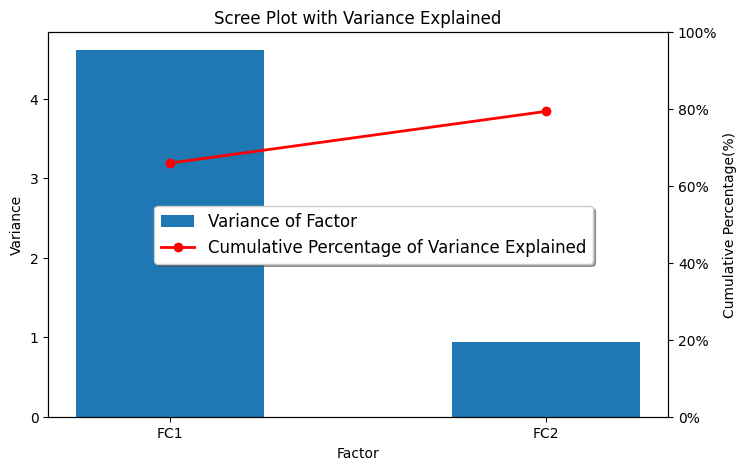

In [6]:
FA_func(auto_mpg, isCorrMX=True, n_factors = 2)

(array([[ 1.53387275e+00,  9.78370976e+01,  3.33424798e+01,
          8.49389564e+02, -1.15756458e+00, -1.14387985e+00,
         -4.71928262e-01],
        [-5.18452823e-01, -3.68000437e+01, -1.16047842e+01,
          4.69846449e+00,  1.35506622e+00,  9.28064081e-01,
          1.26183723e-01]]),
             0         1
 0    0.627602 -1.418066
 1    0.853222 -1.979804
 2    0.550395 -1.933412
 3    0.544884 -1.575647
 4    0.563159 -1.474040
 ..        ...       ...
 387 -0.225797  0.895018
 388 -0.998181  0.055365
 389 -0.800755 -0.517511
 390 -0.420222  0.925484
 391 -0.310146  1.245214
 
 [392 rows x 2 columns],
 array([2.62155893e+00, 1.09263409e+04, 1.24639198e+03, 7.21484707e+05,
        3.17616022e+00, 2.16976404e+00, 2.38638617e-01]),
 array([2.88137555e-01, 2.40266668e+01, 2.35177415e+02, 1.62510935e-03,
        4.43517101e+00, 1.14001509e+01, 4.10220927e-01]),
 array([9.97561506e-01, 2.06279691e-03, 3.55947852e-04, 1.49502847e-05,
        3.92231415e-06, 3.59910740e-07, 5.163

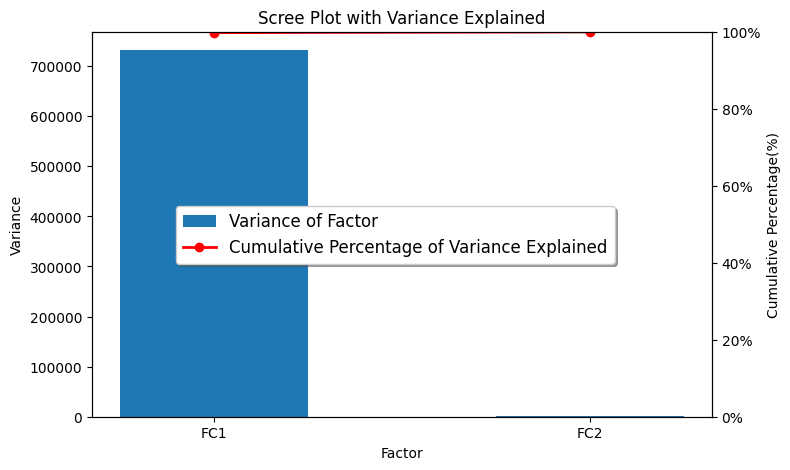

In [7]:
FA_func(auto_mpg, isCorrMX=False, n_factors = 2)

# Q2

In [521]:
#讀取圖片資料並轉為dataframe
data_p = []
for i in range(1,41):
    for j in range(1,11):
        data_p.append(list(Image.open(f'C:/Users/USER/Desktop/Course/Data Analytics/DA05/ORL Faces/ORL Faces/{i}_{j}.png').getdata()))

data_p = pd.DataFrame(np.array(data_p))

#新增性別欄位，女性為0男性則為1
for i in data_p.index:
    if (i <= 9) | (70 <= i <= 79) | (90 <= i <= 99) | (310 <= i <= 319):
        data_p.loc[i, 'sex'] = 0
    else:
        data_p.loc[i, 'sex'] = 1
        
X = data_p.iloc[:,:-1].T
y = data_p['sex']

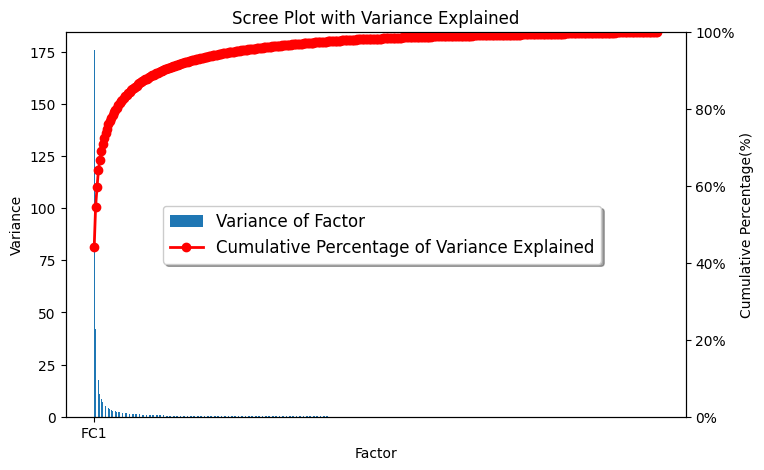

In [487]:
loading_mat, factors, communality_vec, uniqueness_vec, var_contributed = FA_func(X, isCorrMX=True, n_factors = 399)

In [448]:
FC = pd.Series({f"FC{i+1}": var_contributed[i] for i in range(400)}) 
variance_ratio = FC.cumsum()
for ratio in [0.5,0.6,0.7,0.8,0.9]:
    fc_size = len(variance_ratio[variance_ratio.values <= ratio])+1
    print(f"{fc_size} factors are needed to explain {ratio*100:.0f}% of total variance")
    print()

2 factors are needed to explain 50% of total variance

4 factors are needed to explain 60% of total variance

7 factors are needed to explain 70% of total variance

17 factors are needed to explain 80% of total variance

50 factors are needed to explain 90% of total variance



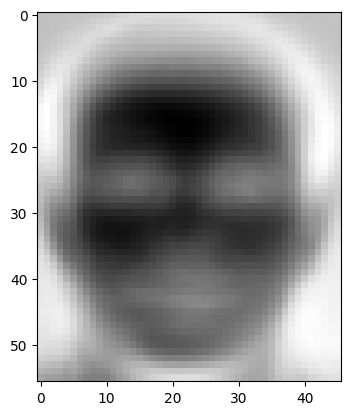

In [517]:
FC1 = factors.iloc[:, 0].to_numpy()
rescaled_FC1 = (FC1 - np.min(FC1)) / (np.max(FC1) - np.min(FC1)) * 255
FC1_matrix = rescaled_FC1.reshape((56, 46))
plt.imshow(FC1_matrix, cmap='gray')
plt.show()


# Q3

3.a

In [ ]:
pls = PLSRegression(n_components=n)
pls.fit(X_train, y_train)
pls.predict(X_test)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(auto_mpg, data_a['mpg'], test_size=(92/392), random_state=0)
Z = (X_train - X_train.mean()) / X_train.std()

Xvar_comp_cum = []
yvar_comp_cum = []
mse = []
for n in range(1,8):
    pls = PLSRegression(n_components=n)
    pls.fit(X_train, y_train)

    UC = pls.x_scores_ @ pls.x_loadings_.T
    Xvar_comp_cum.append(np.var(UC, axis=0).sum()/7)
    
    UR = pls.predict(X_train)
    yvar_comp_cum.append(UR.var()/y_train.var().sum())

    y_pred = pls.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    

Xvar_comp = [Xvar_comp_cum[0]] + [Xvar_comp_cum[i]-Xvar_comp_cum[i-1] for i in range(1,7)]
yvar_comp = [yvar_comp_cum[0]] + [yvar_comp_cum[i]-yvar_comp_cum[i-1] for i in range(1,7)]


results = pd.DataFrame([Xvar_comp, Xvar_comp_cum, yvar_comp, yvar_comp_cum], 
                        columns = [f"component{i}" for i in range(1,8)], 
                        index = ['Var. Explained X', 'Cum. Var. Exp. X', 'Var. Explained Y', 'Cum. Var. Exp. Y']).T

for i in range(7):
    print(f"MSE for {i+1} component : {mse[i]}")

results

MSE for 1 component : 14.707019459759698
MSE for 2 component : 10.991148636934089
MSE for 3 component : 10.134825206774277
MSE for 4 component : 10.365345908979883
MSE for 5 component : 9.905154651852952
MSE for 6 component : 9.931316994140339
MSE for 7 component : 9.787059754377932


,Var. Explained X,Cum. Var. Exp. X,Var. Explained Y,Cum. Var. Exp. Y
component1,0.645987,0.645987,0.739030,0.739030
component2,0.108755,0.754742,0.051653,0.790683
component3,0.069599,0.824341,0.010682,0.801366
component4,0.083421,0.907763,0.007090,0.808455
component5,0.067271,0.975033,0.002697,0.811152
component6,0.015834,0.990868,0.002128,0.813280
component7,0.005799,0.996667,0.000283,0.813563


3.b

In [942]:
X_train, X_test, y_train, y_test = train_test_split(auto_mpg.drop(columns='model year'), data_a[['mpg','model year']], test_size=(92/392), random_state=0)
Z = (X_train - X_train.mean()) / X_train.std()

Xvar_comp_cum = []
yvar_comp_cum = []
mse = []
for n in range(1,7):
    pls = PLSRegression(n_components=n)
    pls.fit(X_train, y_train)

    UC = pls.x_scores_ @ pls.x_loadings_.T
    Xvar_comp_cum.append(np.var(UC, axis=0).sum()/6)
    
    UR = pls.predict(X_train)
    yvar_comp_cum.append(UR.var(axis=0).sum()/y_train.var().sum())

    y_pred = pls.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

Xvar_comp = [Xvar_comp_cum[0]] + [Xvar_comp_cum[i]-Xvar_comp_cum[i-1] for i in range(1,6)]
yvar_comp = [yvar_comp_cum[0]] + [yvar_comp_cum[i]-yvar_comp_cum[i-1] for i in range(1,6)]


results = pd.DataFrame([Xvar_comp, Xvar_comp_cum, yvar_comp, yvar_comp_cum], 
                        columns = [f"component{i}" for i in range(1,7)], 
                        index = ['Var. Explained X', 'Cum. Var. Exp. X', 'Var. Explained Y', 'Cum. Var. Exp. Y']).T

for i in range(6):
    print(f"MSE for {i+1} component : {mse[i]}")

results

MSE for 1 component : 14.564937014187791
MSE for 2 component : 13.810169516452783
MSE for 3 component : 13.77723945925516
MSE for 4 component : 13.675114874108456
MSE for 5 component : 13.236399213903418
MSE for 6 component : 13.104339221197298


,Var. Explained X,Cum. Var. Exp. X,Var. Explained Y,Cum. Var. Exp. Y
component1,0.727791,0.727791,0.582734,0.582734
component2,0.147511,0.875302,0.010434,0.593168
component3,0.073056,0.948357,0.009376,0.602544
component4,0.017890,0.966247,0.009976,0.612520
component5,0.024390,0.990637,0.002015,0.614534
component6,0.006030,0.996667,0.001124,0.615658
